In [15]:
from methodology.gradient_calculator import get_gradient, get_cosine, save_combined_map
from methodology.face_matching_module import FaceMatching
from methodology.plot_gradient import plot_gradient_2

from sklearn import metrics
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve
import cv2
import torch 
import sys
sys.path.append('../ElasticFace')
from backbones.iresnet import iresnet34, iresnet50
from torchvision import transforms
from PIL import Image

from torchvision import transforms
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

In [2]:

class ExtendediResNet34(nn.Module):
    def __init__(self,state_dict):
        super(ExtendediResNet34, self).__init__()
        self.original = iresnet34()
        self.original.load_state_dict(state_dict,strict=True)
        self.cosine_layer = nn.Linear(512, 1,bias=False) 

    def forward(self, x):
        x = self.original(x)  # Pass input through the original ResNet
        x = self.cosine_layer(x)
        return x

In [3]:

def create_model(model,path,device):
    """
    Creates model from:
    :param model: type of model structure in {'iresnet34','iresnet50'}
    :param path: path to model backbone
    :param device: device on which to run the model
    """


    if model == 'iresnet34':
        loaded_model = iresnet34()
    if model == 'iresnet50':
        loaded_model = iresnet50()
    
    state_dict = torch.load(path)
    loaded_model.load_state_dict(state_dict,strict=True)
    loaded_model = loaded_model.to(device)
    return loaded_model

In [4]:
transform = transforms.Compose([
        transforms.Resize((112, 112)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])



th = 0.37185913324356085

img1 = Image.open('D:/Work/Datasets/African_RFW/0.png').convert('RGB')
input_tensor1 = transform(img1)
input_tensor1 = input_tensor1.to(torch.float)

img2 = Image.open('D:/Work/Datasets/African_RFW/1.png').convert('RGB')
input_tensor2 = transform(img2)
input_tensor2 = input_tensor2.to(torch.float)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = create_model('iresnet34','./models/253682backbone.pth',device)

model.eval()
state_dict = torch.load('./models/253682backbone.pth')
model_cos = ExtendediResNet34(state_dict)
model_cos = model_cos.to(device)
model_cos.eval()

input_tensor1 = input_tensor1.to(device)
input_tensor2 = input_tensor2.to(device)
input_tensor1.requires_grad_(True)
input_tensor2.requires_grad_(True)

tensor([[[ 0.8588,  0.8588,  0.8980,  ...,  0.2314, -0.0039, -0.3098],
         [ 0.8824,  0.8902,  0.9216,  ..., -0.1137, -0.2706, -0.4980],
         [ 0.8980,  0.8980,  0.9059,  ..., -0.5137, -0.5451, -0.6157],
         ...,
         [ 0.3098,  0.3176,  0.2941,  ..., -0.0039,  0.0039, -0.0039],
         [ 0.3098,  0.3098,  0.2863,  ..., -0.0510, -0.0431, -0.0510],
         [ 0.2941,  0.3020,  0.2863,  ..., -0.0902, -0.0902, -0.0902]],

        [[ 0.5137,  0.4980,  0.4980,  ..., -0.2078, -0.4039, -0.6784],
         [ 0.5529,  0.5608,  0.5686,  ..., -0.5294, -0.6235, -0.8275],
         [ 0.6157,  0.6235,  0.6235,  ..., -0.8431, -0.8196, -0.8588],
         ...,
         [ 0.0588,  0.0667,  0.0588,  ..., -0.3804, -0.3882, -0.3804],
         [ 0.0588,  0.0588,  0.0431,  ..., -0.3882, -0.3961, -0.3882],
         [ 0.0431,  0.0510,  0.0431,  ..., -0.4118, -0.4118, -0.4118]],

        [[-0.1686, -0.1686, -0.1373,  ..., -0.4980, -0.6471, -0.9137],
         [-0.1216, -0.0980, -0.0667,  ..., -0

In [5]:
model(input_tensor1.unsqueeze(0))

tensor([[ 6.1527e-02,  4.4907e-01,  1.0566e+00,  4.2767e-01,  9.4838e-01,
         -7.5010e-01,  3.5839e-01,  1.2750e+00, -1.7084e+00,  1.8258e-01,
          1.0140e+00, -4.1158e-01, -1.9869e+00, -5.8364e-01,  7.1216e-02,
          9.0849e-01, -1.9201e+00,  9.3446e-01, -1.0711e-02, -2.0198e+00,
          1.9867e+00, -6.5427e-01,  4.8622e-01, -1.2313e+00, -6.3757e-01,
         -1.5530e+00, -9.5876e-01, -1.8035e+00, -1.2571e+00, -7.2984e-01,
         -1.1616e+00,  1.5367e+00, -9.5533e-01, -1.1667e+00,  3.2553e-01,
         -1.1627e+00, -8.5668e-01, -1.0482e+00,  1.3458e+00,  1.8529e-01,
         -1.5771e+00,  8.8101e-01, -1.8541e+00,  1.0857e+00,  4.0593e-01,
          5.4009e-01,  3.1142e-01, -1.6202e-01, -7.0567e-01, -1.0794e+00,
         -6.4287e-02,  1.2047e+00,  8.1957e-01, -1.3313e+00,  5.3693e-01,
          3.3418e-01, -1.7855e+00,  3.8935e-01,  1.5630e-01,  4.6078e-01,
         -1.3538e+00,  4.6474e-01, -1.5118e+00, -4.8980e-01,  1.0057e+00,
          9.3146e-01,  7.7578e-01, -7.

In [6]:
model(input_tensor2.unsqueeze(0))

tensor([[-2.2520e-01, -1.5218e-01,  1.1987e-01,  7.8209e-01,  1.4830e+00,
          5.4264e-01, -3.4023e-01, -1.0926e+00, -9.5658e-01, -6.0843e-02,
         -1.2902e-01, -8.3101e-01, -1.7008e+00,  9.1344e-02, -1.6255e+00,
          1.5719e+00,  2.7876e-01, -2.4340e-01, -3.9160e-01,  1.4111e-01,
          1.3267e+00,  2.6128e-01,  1.1993e+00, -1.8945e-01, -1.0949e+00,
         -9.4298e-01, -1.6831e+00, -8.8811e-01, -6.3596e-01,  4.0577e-01,
         -6.5467e-01,  6.9851e-01, -7.0158e-01,  7.1717e-01,  2.8687e-01,
          5.3889e-01,  1.3885e-01, -1.1754e+00,  8.8996e-01, -1.4502e-01,
         -2.5071e-01,  1.9379e+00, -2.7125e+00, -1.6760e-01,  7.6248e-01,
          8.5364e-01, -4.2785e-02, -3.4412e-01,  5.1264e-01, -9.6053e-02,
         -4.1324e-01, -1.6633e-01, -1.0290e-02, -1.3452e-01, -8.0141e-01,
          2.3001e-01, -6.2323e-01,  8.5924e-01,  1.0908e+00,  1.1985e+00,
         -1.4783e+00,  2.6505e-01, -9.3570e-01,  8.9959e-01, -5.6580e-01,
          1.2269e+00,  1.0210e+00, -6.

In [7]:
get_cosine(input_tensor1.unsqueeze(0), input_tensor2.unsqueeze(0), model_cos, model, 1, 'Balanced34', th)

torch.Size([1, 512])


(tensor([13.9274], device='cuda:0', grad_fn=<MvBackward0>),
 tensor([[[[ 0.5216,  0.5294,  0.5294,  ..., -1.0000, -1.0000, -1.0000],
           [ 0.5294,  0.5294,  0.5294,  ..., -1.0000, -1.0000, -1.0000],
           [ 0.5294,  0.5294,  0.5294,  ..., -1.0000, -1.0000, -1.0000],
           ...,
           [ 0.5686,  0.5608,  0.5529,  ..., -0.9373, -0.9608, -0.9686],
           [ 0.5608,  0.5608,  0.5529,  ..., -0.9216, -0.9608, -0.9686],
           [ 0.5686,  0.5608,  0.5608,  ..., -0.9294, -0.9608, -0.9765]],
 
          [[ 0.5216,  0.5294,  0.5294,  ..., -1.0000, -1.0000, -1.0000],
           [ 0.5294,  0.5294,  0.5294,  ..., -1.0000, -1.0000, -1.0000],
           [ 0.5294,  0.5294,  0.5294,  ..., -1.0000, -1.0000, -1.0000],
           ...,
           [ 0.5686,  0.5608,  0.5529,  ..., -0.9373, -0.9608, -0.9686],
           [ 0.5608,  0.5608,  0.5529,  ..., -0.9216, -0.9608, -0.9686],
           [ 0.5686,  0.5608,  0.5608,  ..., -0.9294, -0.9608, -0.9765]],
 
          [[ 0.5216,  0.52

In [45]:
gradient_pos = get_gradient(input_tensor1.unsqueeze(0), input_tensor2.unsqueeze(0), model_cos, model, 1, 'Balanced34', th)
gradient_neg = get_gradient(input_tensor1.unsqueeze(0), input_tensor2.unsqueeze(0), model_cos, model, 2, 'Balanced34', th)

torch.Size([1, 512])
True None
torch.Size([1, 512])
True None


In [46]:
importances_on1_pos = np.mean(gradient_pos,axis=2)
importances_on1_neg = np.mean(gradient_neg,axis=2)

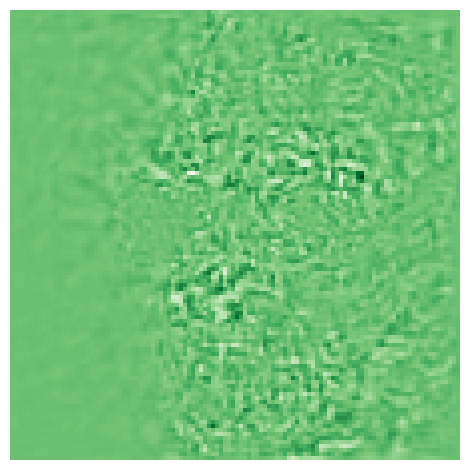

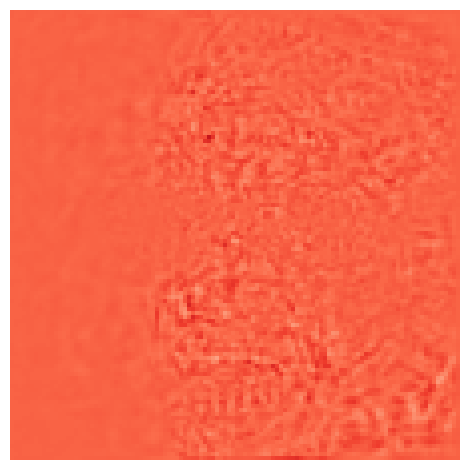

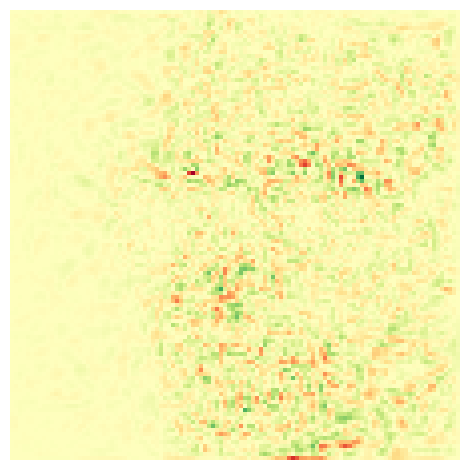

In [47]:
 # get mean gradient
gradient_1_2_pos = np.mean(gradient_pos,axis=2)
gradient_1_2_neg = np.mean(gradient_neg,axis=2)

max_grad = max(map(max, [gradient_1_2_pos.flatten(), gradient_1_2_neg.flatten()]))
min_grad = min(map(min, [gradient_1_2_pos.flatten(), gradient_1_2_neg.flatten()]))
bins = 100

# visualize positive gradient map
plt.imshow(gradient_1_2_pos, vmin=min_grad, vmax=max_grad, cmap='Greens')
plt.axis('off')
plt.tight_layout()
plt.show()
#plt.savefig(os.path.join(plot_path, 'pos_grad_input_{}_ref_{}_replace_{}pct'.format(id1, id2, int(masked * 100))),
#            bbox_inches='tight')

# visualize negative gradient maps
plt.imshow(gradient_1_2_neg, vmin=min_grad, vmax=max_grad, cmap='Reds')
plt.axis('off')
plt.tight_layout()
plt.show()
#plt.savefig(os.path.join(plot_path, 'neg_grad_input_{}_ref_{}_replace_{}pct'.format(id1, id2, int(masked * 100))),
#            bbox_inches='tight')

# visualize combined gradient maps
combi = gradient_1_2_pos - gradient_1_2_neg
bound = max(np.abs(min(map(min, combi))), max(map(max, combi)))
plt.imshow(combi, vmin=bound * -1, vmax=bound, cmap='RdYlGn')
plt.axis('off')
plt.tight_layout()
plt.show()
#plt.savefig(os.path.join(plot_path, 'combi_grad_input_{}_ref_{}_replace_{}pct'.format(id1, id2, int(masked * 100))),
#            bbox_inches='tight')

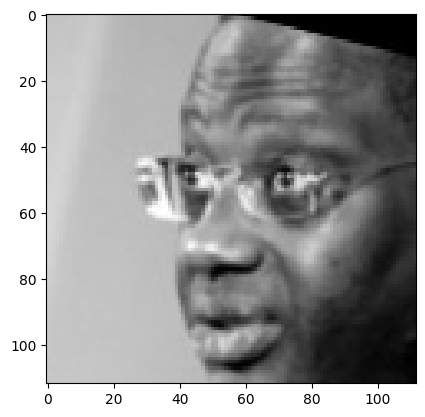

In [25]:
plt.imshow(img1)

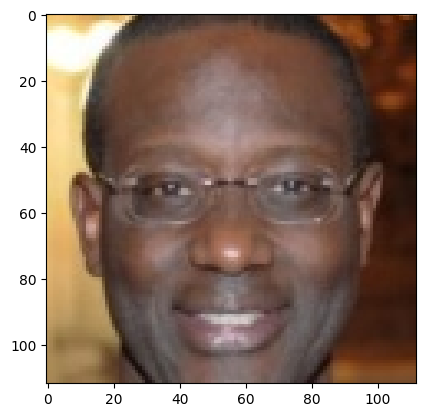

In [26]:
plt.imshow(img2)

In [ ]:
def compute_gradients():
    """Gradient computation"""
    print('Compute gradients', '-'*20)

    print('Load Images')
    imgs = utils_os.load_all_images(utils_os.image_iter(SRC_PATH_GRAD))
    all_pairs, gen_imp = utils_os.get_pairs_genimp()
    thr = np.load(DEST_PATH_THR)

    print('Compute Gradients')
    for x in range(2):
        for pair in tqdm(all_pairs):
            id1 = int(pair[0])
            id2 = int(pair[1])

            # compute positive gradient
            gradient = get_gradient(imgs[id1], imgs[id2], model, backbone, 1, MODELNAME, thr)
            np.save(os.path.join(DEST_PATH_GRAD, '{}_{}_gradient_{}.npy'.format(id1, id2, "pos")), gradient)

            # compute negative gradient
            gradient = get_gradient(imgs[id1], imgs[id2], model, backbone, 2, MODELNAME, thr)
            np.save(os.path.join(DEST_PATH_GRAD, '{}_{}_gradient_{}.npy'.format(id1, id2, "neg")), gradient)

        save_combined_map(all_pairs, DEST_PATH_GRAD)
        if PATCHED_IMGS:
            break
        all_pairs = all_pairs[:, [1, 0]]